# **(CVD) heart Diesease Prediction using logistic regression with confusion matrix machine learning**


The dataset used is publicly available on the Kaggle website. It is a cardiovascular study in residents of the city of Framingham, Massachusetts. The purpose of the classification is to predict whether the patient is at risk for heart disease (CVD) in the next 10 years. 

The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

in this code work i am implementing the algorithm for CHD 
By Implementing the  mentioned model we will get the goal of developing a system with increased rate of accuracy of estimating the new patient getting heart attack percentage. 


**1.GETTING THE DATASET**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
hearts_d= pd.read_csv("framingham.csv")

**2.DATA ANALYSIS**




In [ ]:
#Checking the first ten observations
hearts_d.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [ ]:
#Checking the bottom ten observations
hearts_d.tail(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4230,0,56,1.0,1,3.0,0.0,0,1,0,268.0,170.0,102.0,22.89,57.0,NaN,0
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [ ]:
#Checking the shape of our dataset
hearts_d.shape

(4240, 16)

In [ ]:
# getting some info about the data
hearts_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


**3.VISUALIZATION** 

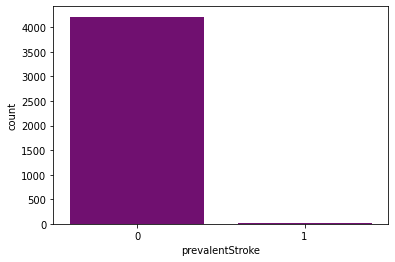

In [ ]:
sns.countplot(x="prevalentStroke", data=hearts_d ,color='purple')

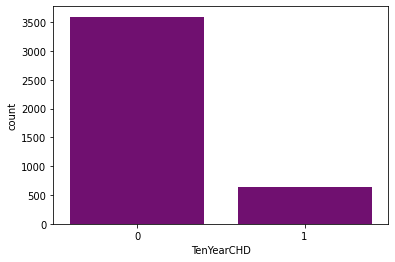

In [ ]:
sns.countplot(x="TenYearCHD", data=hearts_d ,color='purple')

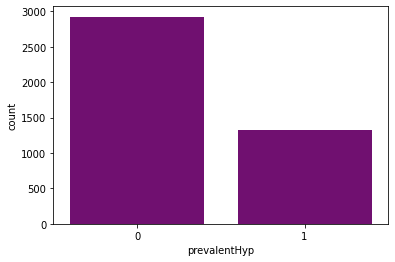

In [ ]:
sns.countplot(x="prevalentHyp", data=hearts_d, color='purple')

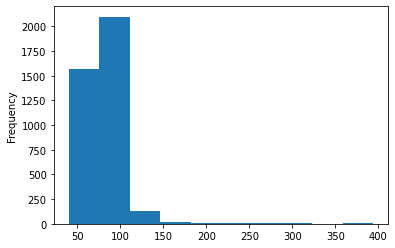

In [ ]:
hearts_d["glucose"].plot.hist()

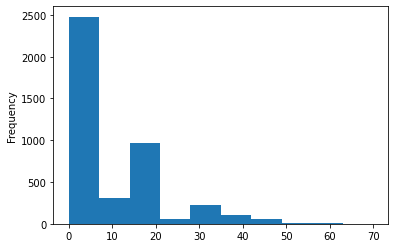

In [ ]:
hearts_d["cigsPerDay"].plot.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Agewise distribution of the patients')

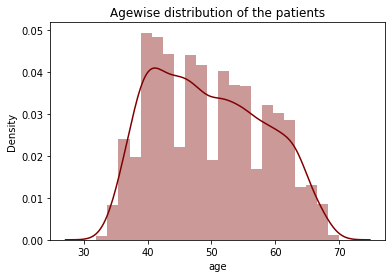

In [ ]:
sns.distplot(hearts_d.age ,color='maroon')
plt.title('Agewise distribution of the patients')

**4.FINDING THE NULL VALUE**

In [ ]:
hearts_d.isnull()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
hearts_d.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

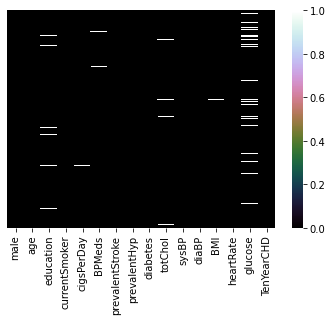

In [ ]:
sns.heatmap(hearts_d.isnull(),yticklabels=False, cmap="cubehelix")

**WRANGLING OF DATA OR DROPING  VALUE**

In [ ]:
hearts_d.drop("education", axis=1, inplace=True)
hearts_d.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
hearts_d['cigsPerDay'] = hearts_d['cigsPerDay'].fillna((hearts_d['cigsPerDay'].median()))
hearts_d['BPMeds'] = hearts_d['BPMeds'].fillna(0)
hearts_d['totChol'] = hearts_d['totChol'].fillna((hearts_d['totChol'].median()))
hearts_d['BMI'] = hearts_d['BMI'].fillna((hearts_d['BMI'].median()))
hearts_d['heartRate'] = hearts_d['heartRate'].fillna((hearts_d['heartRate'].median()))
hearts_d.head(10)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


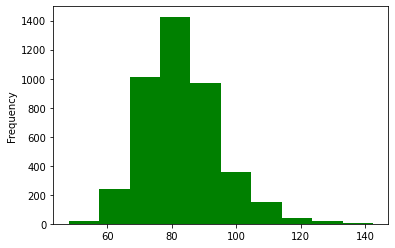

In [ ]:
hearts_d["diaBP"].plot.hist(facecolor='green')

In [ ]:
hearts_d= hearts_d.dropna()

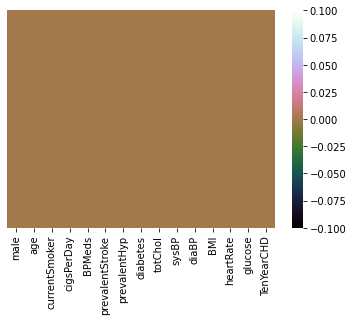

In [ ]:
sns.heatmap(hearts_d.isnull(), yticklabels=False, cmap="cubehelix")

In [ ]:
hearts_d.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

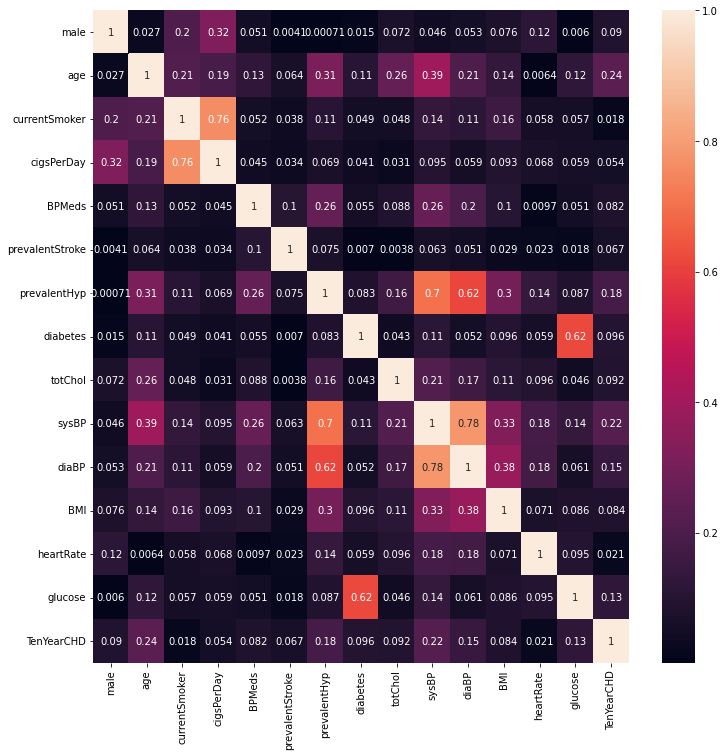

In [ ]:
#Plotting the correlation matrix using heatmap
plt.figure(figsize=(12,12))
correlation = hearts_d.corr()
sns.heatmap(abs(correlation), annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a20b0e590>,
      dtype=object)

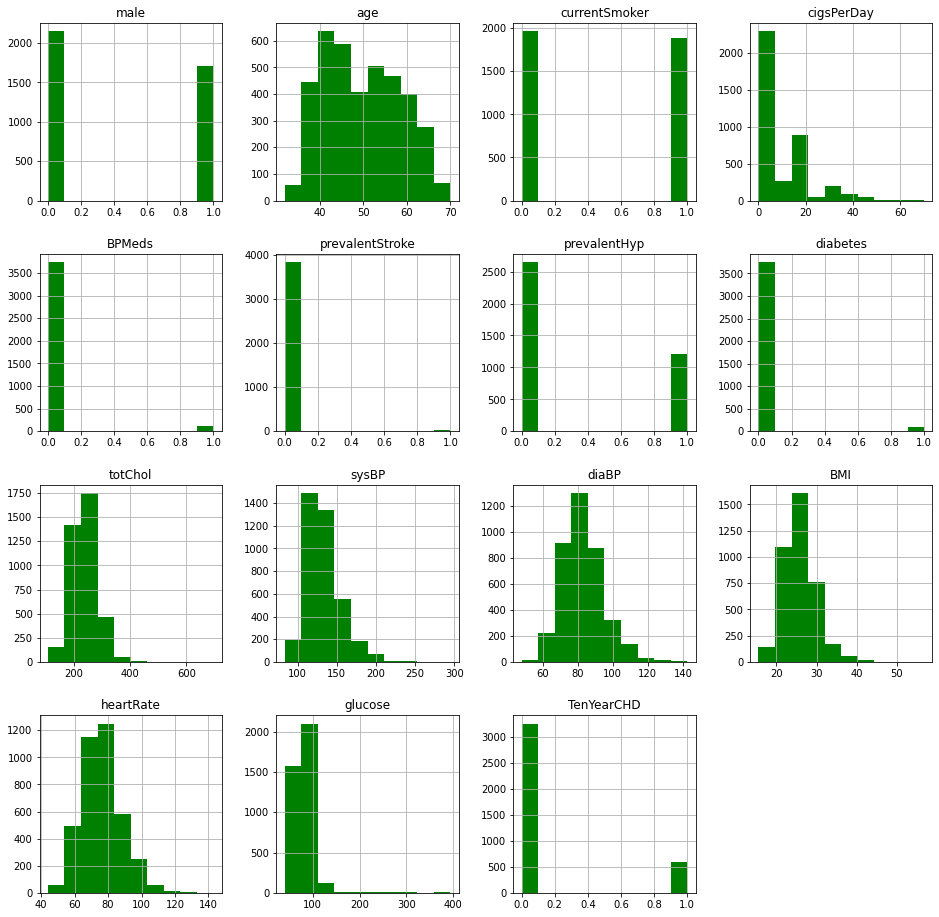

In [ ]:
hearts_d.hist(figsize=(16,16),facecolor='green')

**SPLITTING OF DATSET INTO TRAIN AND TEST MODEL**


In [ ]:
from sklearn import datasets,linear_model
from sklearn.model_selection import GridSearchCV
import sklearn.preprocessing as pre
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_curve,roc_auc_score


In [ ]:
x = hearts_d.drop(['TenYearCHD'],axis=1)
y = hearts_d.TenYearCHD
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

**NORMALIZED FEATURES USING  STANDARDSCALER**

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
log = LogisticRegression()
log.fit(x_train,y_train)
YPred=log.predict(x_test)
import warnings
warnings.filterwarnings("ignore")


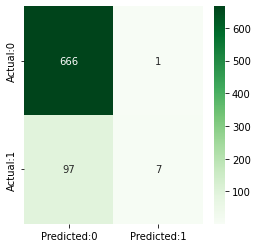

In [ ]:
from sklearn.metrics import confusion_matrix
conf_d=confusion_matrix(y_test,YPred)
conf_matrix=pd.DataFrame(data=conf_d,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Greens")

In [ ]:
result1=accuracy_score(y_test,YPred)
result2=precision_score(y_test,YPred)
recall_score=recall_score(y_test,YPred)

print("Accuracy score:",result1)
print("Precision score:",result2)
print("Recall score:",recall_score)

Accuracy score: 0.8728923476005188
Precision score: 0.875
Recall score: 0.0673076923076923


In [ ]:
Accur_score = (result1) * 100
precision_score = (result2) * 100
rec_score=(recall_score)*100
results_d = pd.DataFrame(data=[["Logistic Regression", Accur_score, precision_score,rec_score]], 
                          columns=['Model', 'model Accuracy %', 'precision Accuracy %', 'recall Accuracy %'])
results_d

,Model,model Accuracy %,precision Accuracy %,recall Accuracy %
0,Logistic Regression,87.289235,87.5,6.730769


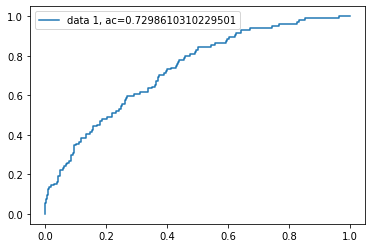

In [ ]:
y_pred = log.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred)
ac = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, ac="+str(ac))
plt.legend(loc=2)
plt.show()